# Evaluation of Data Science techniques for predicting buying and selling shares for maximum profit

This evaluation will test multiple Data Science techniques including neural networks, decision trees, time series models, and combination of different models to determine which model bests predicts when to buy and sell shares for maximum profit.

## Methodology
To start evaluation a ground truth to evaluate the models against.
The data used for this evaluation is the history of JSE:PAN from 2023 to 2025 from Google Finance Sheets and exported to a CSV.
The ground truth is taken to the total profit from buying on local minimums and selling on local maximums.

## Ground Truth Data Generation
### Loading the input data from extracted Google Finance Sheet (CSV)

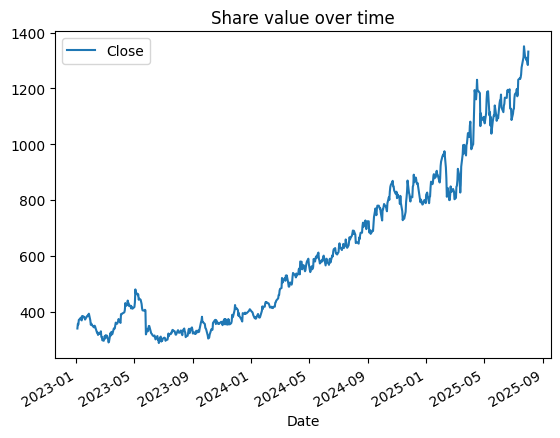

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('JSE PAN 2023 - 2025.csv', parse_dates=['Date'])

df.plot(x='Date', y='Close')
plt.title('Share value over time')
plt.show()